<a href="https://colab.research.google.com/github/ankitg-02/sales_analysis/blob/main/consumer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,r2_score

In [2]:
#importing data from excelsheet
consumer_sales=pd.read_excel("/content/Sample-sales-data-excel.xls")
data=pd.DataFrame(consumer_sales)
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
consumer=data.groupby('Segment')
consumer_mod=consumer.get_group('Consumer')
consumer_mod.shape

(5191, 21)

In [4]:
consumer_mod.dtypes

,0
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


In [5]:
consumer_mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5191 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         5191 non-null   int64         
 1   Order ID       5191 non-null   object        
 2   Order Date     5191 non-null   datetime64[ns]
 3   Ship Date      5191 non-null   datetime64[ns]
 4   Ship Mode      5191 non-null   object        
 5   Customer ID    5191 non-null   object        
 6   Customer Name  5191 non-null   object        
 7   Segment        5191 non-null   object        
 8   Country        5191 non-null   object        
 9   City           5191 non-null   object        
 10  State          5191 non-null   object        
 11  Postal Code    5191 non-null   int64         
 12  Region         5191 non-null   object        
 13  Product ID     5191 non-null   object        
 14  Category       5191 non-null   object        
 15  Sub-Category   5191 non-nu

In [6]:
for i in consumer_mod.columns:
  print(i,':','\n',consumer_mod[i].unique())

Row ID : 
 [   1    2    4 ... 9992 9993 9994]
Order ID : 
 ['CA-2016-152156' 'US-2015-108966' 'CA-2014-115812' ... 'CA-2014-110422'
 'CA-2017-121258' 'CA-2017-119914']
Order Date : 
 <DatetimeArray>
['2016-11-08 00:00:00', '2015-10-11 00:00:00', '2014-06-09 00:00:00',
 '2017-04-15 00:00:00', '2016-12-05 00:00:00', '2014-11-11 00:00:00',
 '2014-05-13 00:00:00', '2014-08-27 00:00:00', '2017-07-16 00:00:00',
 '2015-09-25 00:00:00',
 ...
 '2015-05-09 00:00:00', '2014-05-21 00:00:00', '2016-10-10 00:00:00',
 '2014-11-06 00:00:00', '2015-12-29 00:00:00', '2016-08-21 00:00:00',
 '2014-12-28 00:00:00', '2015-09-06 00:00:00', '2015-05-17 00:00:00',
 '2014-01-21 00:00:00']
Length: 1044, dtype: datetime64[ns]
Ship Date : 
 <DatetimeArray>
['2016-11-11 00:00:00', '2015-10-18 00:00:00', '2014-06-14 00:00:00',
 '2017-04-20 00:00:00', '2016-12-10 00:00:00', '2014-11-18 00:00:00',
 '2014-05-15 00:00:00', '2014-09-01 00:00:00', '2017-07-18 00:00:00',
 '2015-09-30 00:00:00',
 ...
 '2015-05-13 00:00:00'

In [7]:
consumer_mod.describe(include='all')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,5191.000000,5191,5191,5191,5191,5191,5191,5191,5191,5191,...,5191.000000,5191,5191,5191,5191,5191,5191.000000,5191.000000,5191.000000,5191.000000
unique,NaN,2586,NaN,NaN,4,409,409,1,1,422,...,NaN,4,1716,3,17,1704,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,NaN,NaN,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,NaN,West,TEC-AC-10003832,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,NaN,NaN,3085,37,37,5191,5191,504,...,NaN,1672,12,3127,780,29,NaN,NaN,NaN,NaN
mean,4928.015604,NaN,2016-04-20 04:21:02.184550144,2016-04-24 02:57:15.638605312,NaN,NaN,NaN,NaN,NaN,NaN,...,55649.895781,NaN,NaN,NaN,NaN,NaN,223.733644,3.760547,0.158141,25.836873
min,1.000000,NaN,2014-01-03 00:00:00,2014-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,1453.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2439.500000,NaN,2015-04-28 00:00:00,2015-05-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,23464.000000,NaN,NaN,NaN,NaN,NaN,17.264000,2.000000,0.000000,1.583550
50%,4859.000000,NaN,2016-06-06 00:00:00,2016-06-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,60201.000000,NaN,NaN,NaN,NaN,NaN,53.720000,3.000000,0.200000,8.375400
75%,7373.500000,NaN,2017-05-14 00:00:00,2017-05-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,90008.000000,NaN,NaN,NaN,NaN,NaN,206.106000,5.000000,0.200000,28.606700
max,9994.000000,NaN,2017-12-30 00:00:00,2018-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,99301.000000,NaN,NaN,NaN,NaN,NaN,13999.960000,14.000000,0.800000,6719.980800


In [8]:
consumer_mod['Category'].value_counts()

,count
Category,
Office Supplies,3127
Furniture,1113
Technology,951


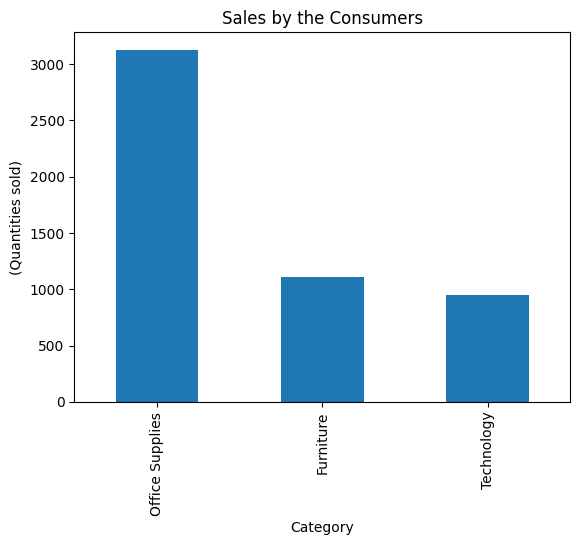

In [9]:
#sales of category items under Consumer segment
plt.xlabel("(Category)")
plt.ylabel("(Quantities sold)")
consumer_mod['Category'].value_counts().plot(kind='bar')
plt.title("Sales by the Consumers")
plt.show()

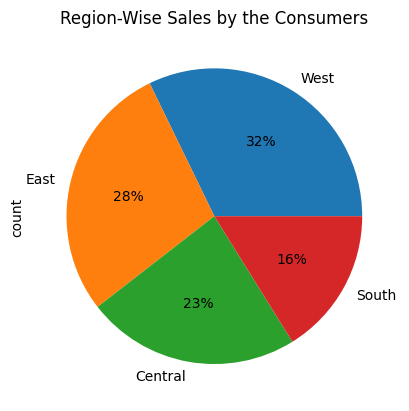

In [10]:
#distirbution of sales pattern about the region by the Corporate category
consumer_mod['Region'].value_counts().plot(kind="pie",autopct='%1.0f%%')
plt.title("Region-Wise Sales by the Consumers")
plt.show()

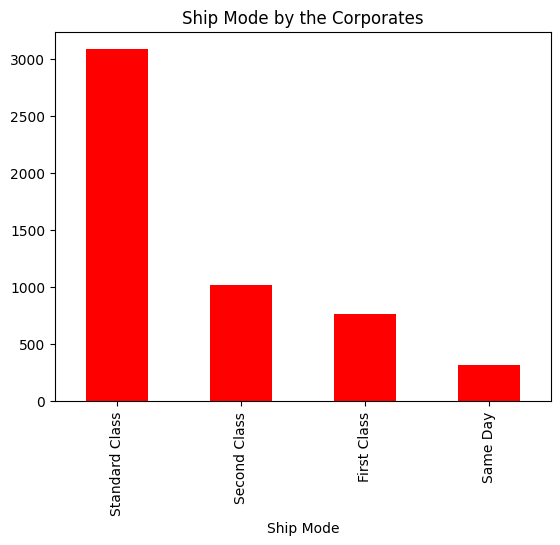

In [11]:
#Shipping mode of items ordered by Consumer segment
consumer_mod['Ship Mode'].value_counts().plot(kind='bar',color='red')
plt.title("Ship Mode by the Corporates")
plt.show()

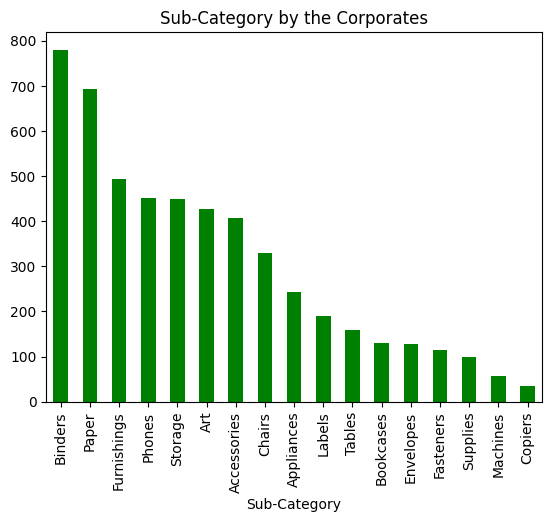

In [12]:
#sub-category items ordered by the Corporate segment
consumer_mod['Sub-Category'].value_counts().plot(kind='bar',color='green')
plt.title("Sub-Category by the Corporates")
plt.show()

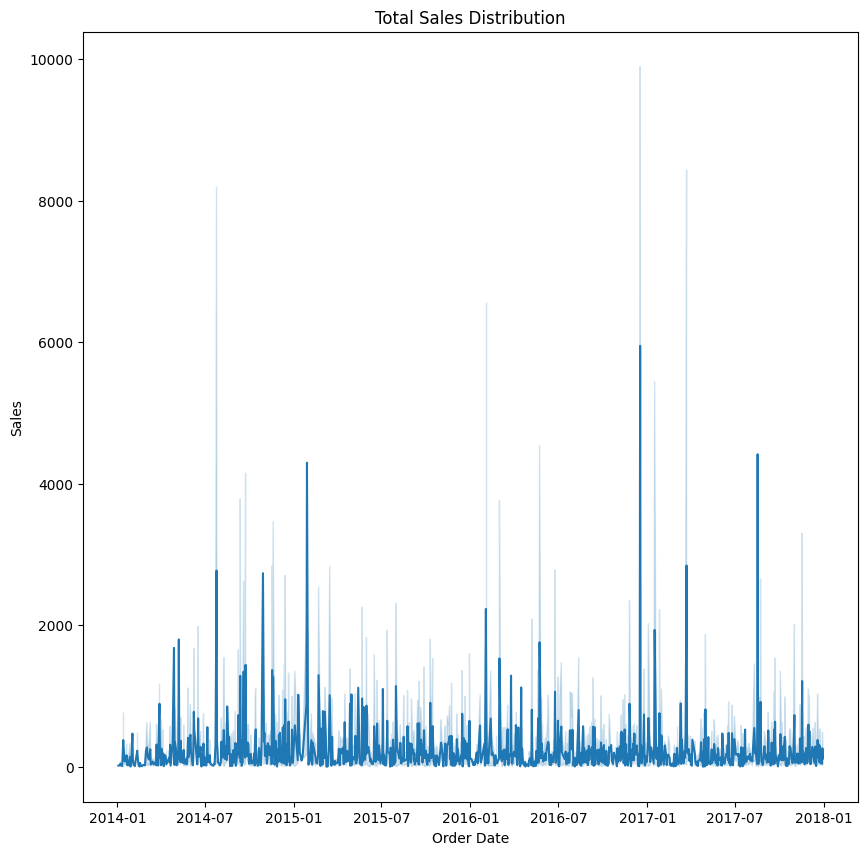

In [13]:
#sales pattern distribution
plt.figure(figsize=(10,10))
sns.lineplot(y=consumer_mod['Sales'],x=consumer_mod['Order Date'])
plt.title("Total Sales Distribution")
plt.show()

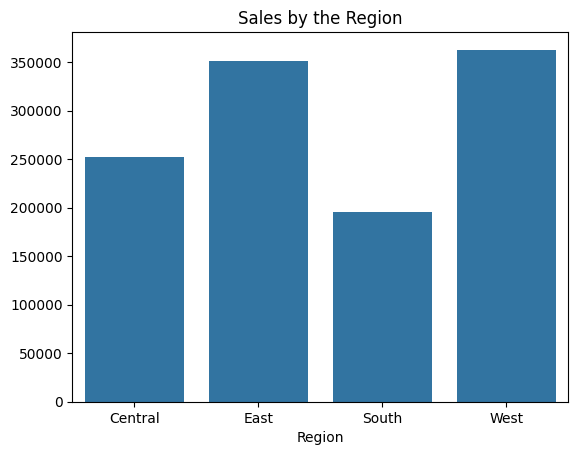

In [14]:
#sales distribution pattern region-wise
sales_region=consumer_mod.groupby('Region')['Sales'].sum()
sns.barplot(x=sales_region.index,y=sales_region.values)
plt.title("Sales by the Region")
plt.show()

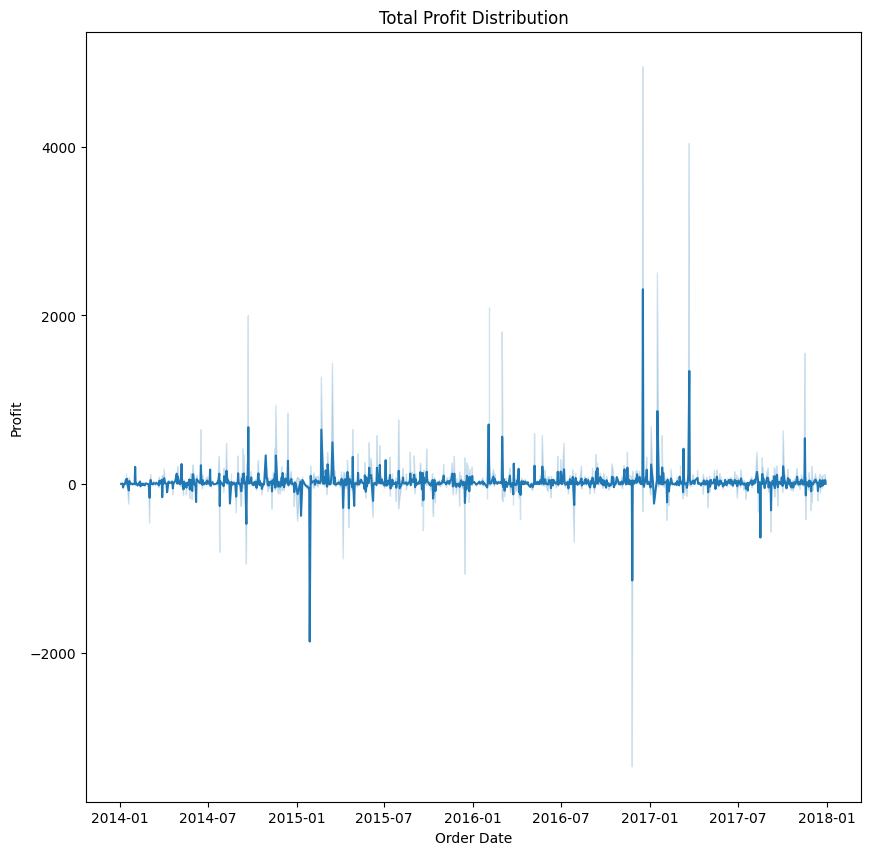

In [15]:
#profit pattern distribution
plt.figure(figsize=(10,10))
sns.lineplot(y=consumer_mod['Profit'],x=consumer_mod['Order Date'])
plt.title("Total Profit Distribution")
plt.show()

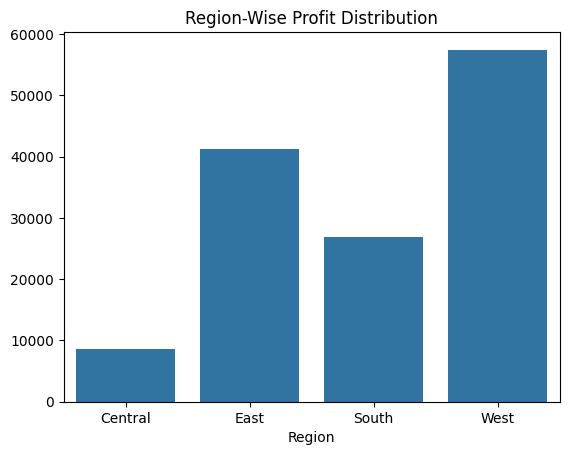

In [16]:
#profit pattern distribution
profit_by_region=consumer_mod.groupby('Region')['Profit'].sum()
sns.barplot(y=profit_by_region.values,x=profit_by_region.index)
plt.title("Region-Wise Profit Distribution")
plt.show()

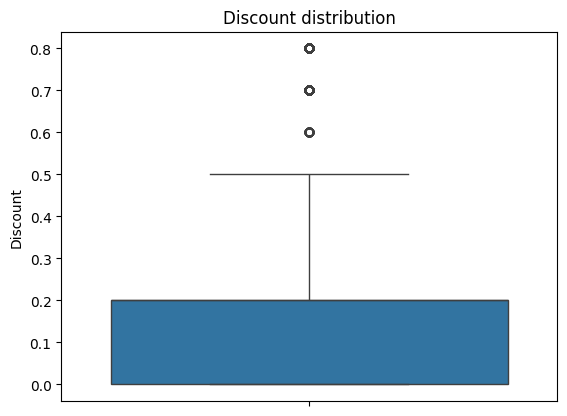

In [17]:
#discount pattern distribution
sns.boxplot(consumer_mod['Discount'])
plt.title("Discount distribution")
plt.show()

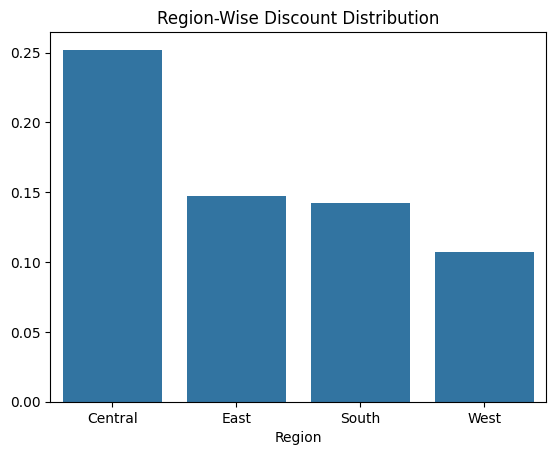

In [18]:
#discount pattern distribution
discount_by_region=consumer_mod.groupby('Region')['Discount'].mean()
sns.barplot(y=discount_by_region.values,x=discount_by_region.index)
plt.title("Region-Wise Discount Distribution")
plt.show()

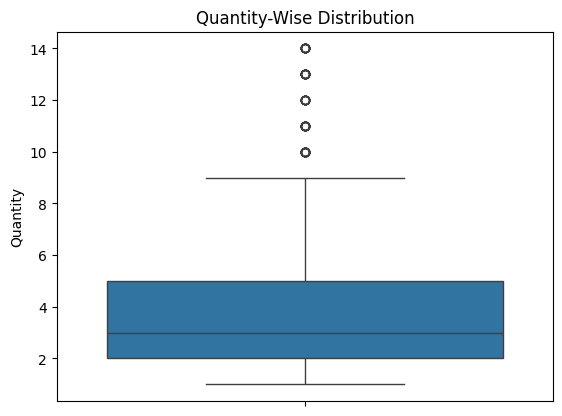

In [19]:
#quantity pattern distribution
sns.boxplot(consumer_mod['Quantity'])
plt.title("Quantity-Wise Distribution")
plt.show()

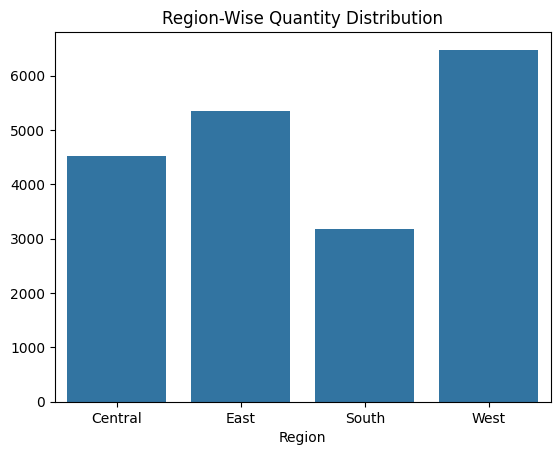

In [20]:
#quantity pattern distribution
quantity_by_region=consumer_mod.groupby('Region')['Quantity'].sum()
sns.barplot(y=quantity_by_region.values,x=quantity_by_region.index)
plt.title("Region-Wise Quantity Distribution")
plt.show()

In [21]:
oe=OrdinalEncoder()
consumer_mod['Ship Mode']=oe.fit_transform(consumer_mod[['Ship Mode']])
consumer_mod['City']=oe.fit_transform(consumer_mod[['City']])
consumer_mod['State']=oe.fit_transform(consumer_mod[['State']])
consumer_mod['Region']=oe.fit_transform(consumer_mod[['Region']])
consumer_mod['Category']=oe.fit_transform(consumer_mod[['Category']])
consumer_mod['Sub-Category']=oe.fit_transform(consumer_mod[['Sub-Category']])
consumer_mod['Segment']=oe.fit_transform(consumer_mod[['Segment']])
consumer_mod['Country']=oe.fit_transform(consumer_mod[['Country']])

<ipython-input-21-36fb204b46d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumer_mod['Ship Mode']=oe.fit_transform(consumer_mod[['Ship Mode']])
<ipython-input-21-36fb204b46d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumer_mod['City']=oe.fit_transform(consumer_mod[['City']])
<ipython-input-21-36fb204b46d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [22]:
consumer_mod.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,2.0,CG-12520,Claire Gute,0.0,0.0,152.0,...,42420,2.0,FUR-BO-10001798,0.0,4.0,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,2.0,CG-12520,Claire Gute,0.0,0.0,152.0,...,42420,2.0,FUR-CH-10000454,0.0,5.0,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,3.0,SO-20335,Sean O'Donnell,0.0,0.0,117.0,...,33311,2.0,FUR-TA-10000577,0.0,16.0,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,3.0,SO-20335,Sean O'Donnell,0.0,0.0,117.0,...,33311,2.0,OFF-ST-10000760,1.0,14.0,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,2014-06-09,2014-06-14,3.0,BH-11710,Brosina Hoffman,0.0,0.0,211.0,...,90032,3.0,FUR-FU-10001487,0.0,9.0,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694


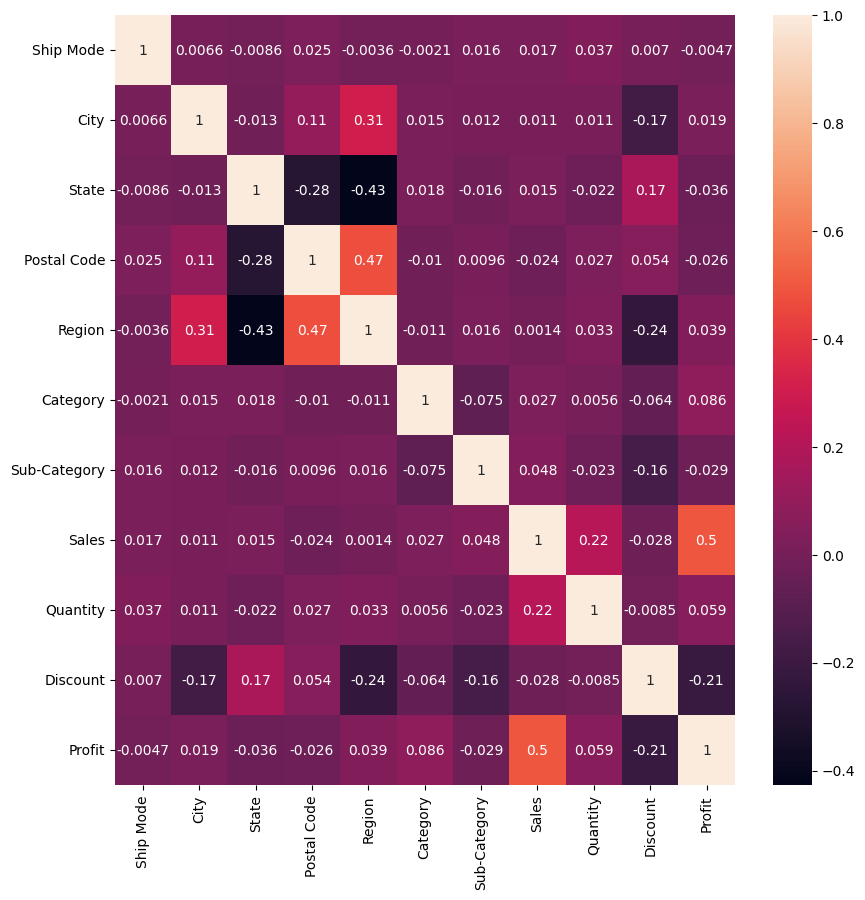

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(consumer_mod.drop(columns=['Row ID','Order ID','Order Date','Ship Date','Customer ID','Customer Name','Country','Segment','Product ID','Product Name'],axis=1).corr(),annot=True)
plt.show()


In [24]:
consumer_mod_data=pd.DataFrame(consumer_mod.drop(columns=['Row ID','Order ID','Order Date','Ship Date','Customer ID','Customer Name','Country','Segment','Product ID','Product Name'],axis=1))
consumer_mod_data.head()

,Ship Mode,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,2.0,152.0,15.0,42420,2.0,0.0,4.0,261.9600,2,0.00,41.9136
1,2.0,152.0,15.0,42420,2.0,0.0,5.0,731.9400,3,0.00,219.5820
3,3.0,117.0,8.0,33311,2.0,0.0,16.0,957.5775,5,0.45,-383.0310
4,3.0,117.0,8.0,33311,2.0,1.0,14.0,22.3680,2,0.20,2.5164
5,3.0,211.0,3.0,90032,3.0,0.0,9.0,48.8600,7,0.00,14.1694


In [25]:
s=StandardScaler()
consumer_mod_data['Quantity']=s.fit_transform(consumer_mod_data[['Quantity']])
consumer_mod_data['Discount']=s.fit_transform(consumer_mod_data[['Discount']])

In [26]:
for i in consumer_mod_data.columns:
  if consumer_mod_data[i].dtype=='int':
    print(i,':\n')
    q3=consumer_mod_data[i].quantile(0.75)
    q1=consumer_mod_data[i].quantile(0.25)
    iqr=q3-q1
    upper_limit=q3+1.5*iqr
    lower_limit=q1-1.5*iqr
    print(f'upper limit of {i}:',upper_limit)
    print(f'lower limit of {i}:',lower_limit)
  elif consumer_mod_data[i].dtype=='float':
    print(i,':\n')
    q3=consumer_mod_data[i].quantile(0.75)
    q1=consumer_mod_data[i].quantile(0.25)
    iqr=q3-q1
    upper_limit=q3+1.5*iqr
    lower_limit=q1-1.5*iqr
    print(f'upper limit of {i}:',upper_limit)
    print(f'lower limit of {i}:',lower_limit)

Ship Mode :

upper limit of Ship Mode: 4.5
lower limit of Ship Mode: 0.5
City :

upper limit of City: 602.5
lower limit of City: -161.5
State :

upper limit of State: 81.5
lower limit of State: -42.5
Postal Code :

upper limit of Postal Code: 189824.0
lower limit of Postal Code: -76352.0
Region :

upper limit of Region: 6.0
lower limit of Region: -2.0
Category :

upper limit of Category: 1.0
lower limit of Category: 1.0
Sub-Category :

upper limit of Sub-Category: 25.5
lower limit of Sub-Category: -10.5
Sales :

upper limit of Sales: 489.36899999999997
lower limit of Sales: -265.99899999999997
Quantity :

upper limit of Quantity: 2.6009389198417487
lower limit of Quantity: -2.837082366505348
Discount :

upper limit of Discount: 1.6477927523312097
lower limit of Discount: -2.2082831535856764
Profit :

upper limit of Profit: 69.141425
lower limit of Profit: -38.95117499999999


In [27]:
consumer_mod_data=consumer_mod_data[
    (consumer_mod_data['Quantity']>=0) & (consumer_mod_data['Quantity']<=2.6009389198417487)  &
    (consumer_mod_data['Discount']>=0) & (consumer_mod_data['Discount']<1)  &
    (consumer_mod_data['Sales']>=0) & (consumer_mod_data['Sales']<=489.36899999999997)

]

In [28]:
#splitting the dataset
x=consumer_mod_data.drop(columns=['Profit'],axis='1')
y=consumer_mod_data['Profit']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.5,random_state=42)

**Predictive Models**

In [29]:
model_1 = LinearRegression()
model_2 = xgb.XGBRegressor()
model_3 = RandomForestRegressor()
model_4 = GradientBoostingRegressor()
model_5 = AdaBoostRegressor()
model_6 = DecisionTreeRegressor()
model_7 = KNeighborsRegressor()
model_8 = SVR()
model_9=Ridge()
model_10=Lasso()

In [30]:
model_1.fit(x_train, y_train)
model_2.fit(x_train, y_train)
model_3.fit(x_train, y_train)
model_4.fit(x_train, y_train)
model_5.fit(x_train, y_train)
model_6.fit(x_train, y_train)
model_7.fit(x_train, y_train)
model_8.fit(x_train, y_train)
model_9.fit(x_train, y_train)
model_10.fit(x_train, y_train)

Lasso()

In [31]:
pred_1 = model_1.predict(x_test)
pred_2 = model_2.predict(x_test)
pred_3 = model_3.predict(x_test)
pred_4=model_4.predict(x_test)
pred_5=model_5.predict(x_test)
pred_6=model_6.predict(x_test)
pred_7=model_7.predict(x_test)
pred_8=model_8.predict(x_test)
pred_9=model_9.predict(x_test)
pred_10=model_10.predict(x_test)

In [32]:
pred1 = model_1.predict(x_val)
pred2 = model_2.predict(x_val)
pred3 = model_3.predict(x_val)
pred4=model_4.predict(x_val)
pred5=model_5.predict(x_val)
pred6=model_6.predict(x_val)
pred7=model_7.predict(x_val)
pred8=model_8.predict(x_val)
pred9=model_9.predict(x_val)
pred10=model_10.predict(x_val)

**Predictive Model's Performance**

test set for model1
Performance of Model 1:

Mean Squared Error: 809.2703657635441 

Root Mean Squared Error: 28.447677686650348 

Mean Absolute Error: 18.225481950509057 

Explained Variance Score: 0.15078528811047975 

R2 Score: 0.15046908840649575 





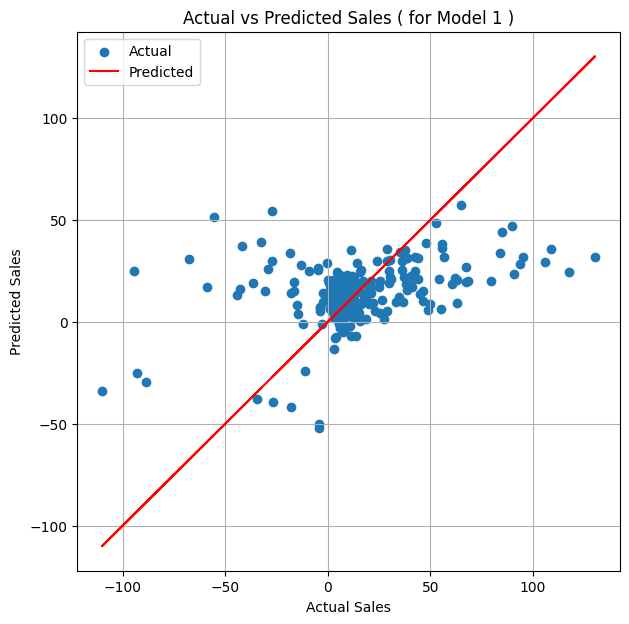



validation set for model1
Performance of Model 1:

Mean Squared Error: 998.5470061737095 

Root Mean Squared Error: 31.5997944008139 

Mean Absolute Error: 19.72498292807598 

Explained Variance Score: 0.09929605703355293 

R2 Score: 0.09925876611312212 





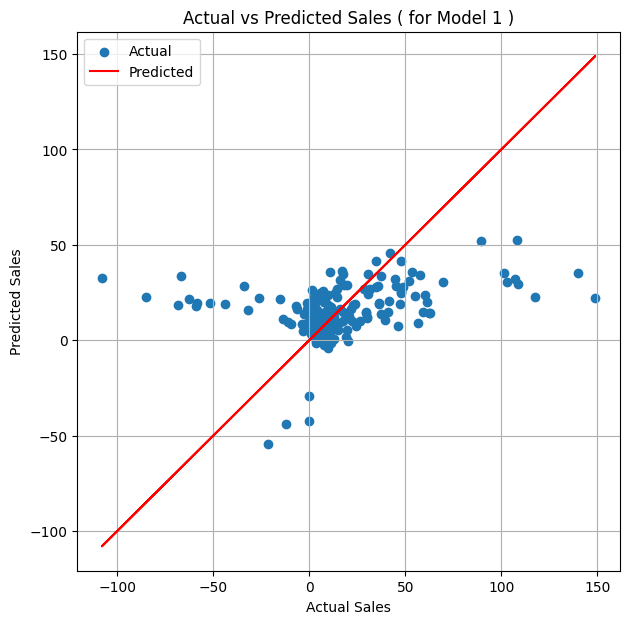

test set for model2
Performance of Model 2:

Mean Squared Error: 727.3401464349762 

Root Mean Squared Error: 26.969244454284887 

Mean Absolute Error: 14.50782547645925 

Explained Variance Score: 0.2539141507176451 

R2 Score: 0.23647526984820033 





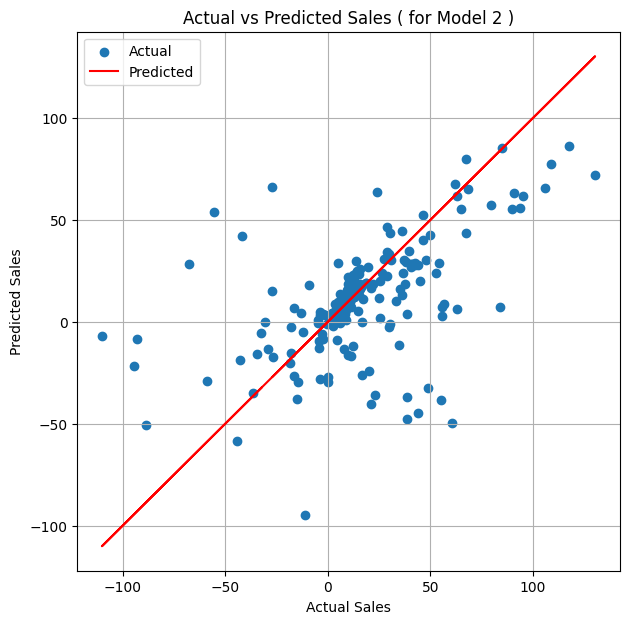



validation set for model2
Performance of Model 2:

Mean Squared Error: 725.50345227141 

Root Mean Squared Error: 26.93517128721126 

Mean Absolute Error: 13.847507922047193 

Explained Variance Score: 0.3512723340682583 

R2 Score: 0.3455582253536328 





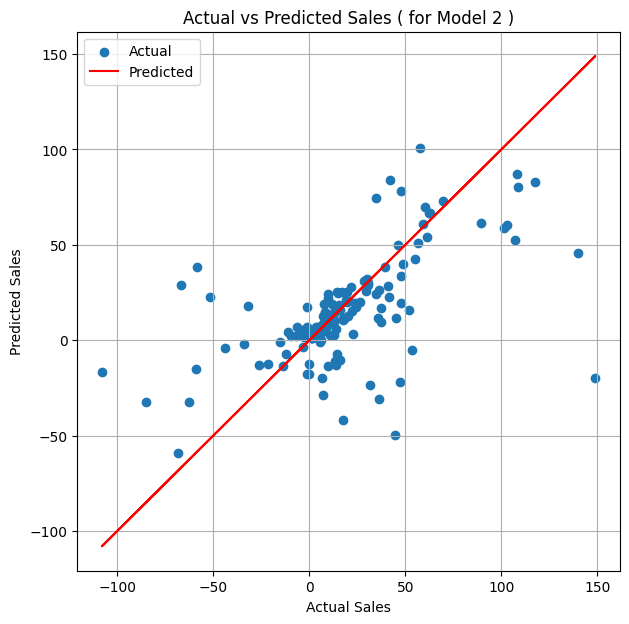

test set for model3
Performance of Model 3:

Mean Squared Error: 578.513132391719 

Root Mean Squared Error: 24.052299939750437 

Mean Absolute Error: 13.442749298449613 

Explained Variance Score: 0.3981398736782388 

R2 Score: 0.39270630740833423 





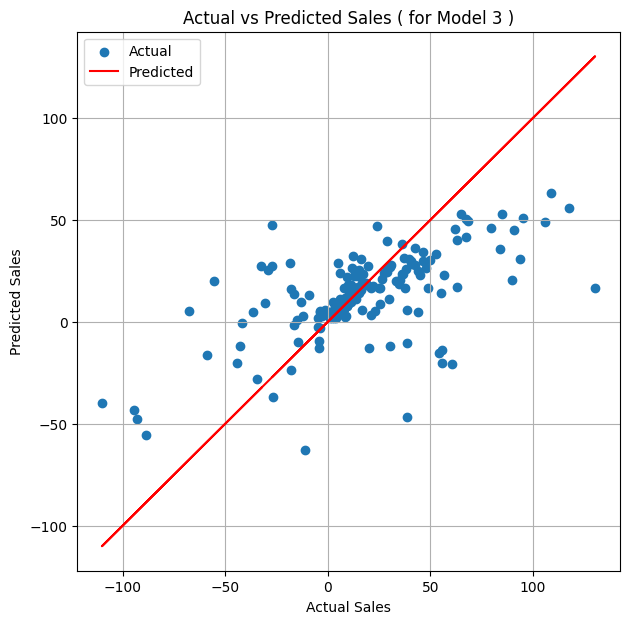



validation set for model3
Performance of Model 3:

Mean Squared Error: 655.9256646321534 

Root Mean Squared Error: 25.61104575436453 

Mean Absolute Error: 13.103788979381445 

Explained Variance Score: 0.41291594963926415 

R2 Score: 0.4083210015692982 





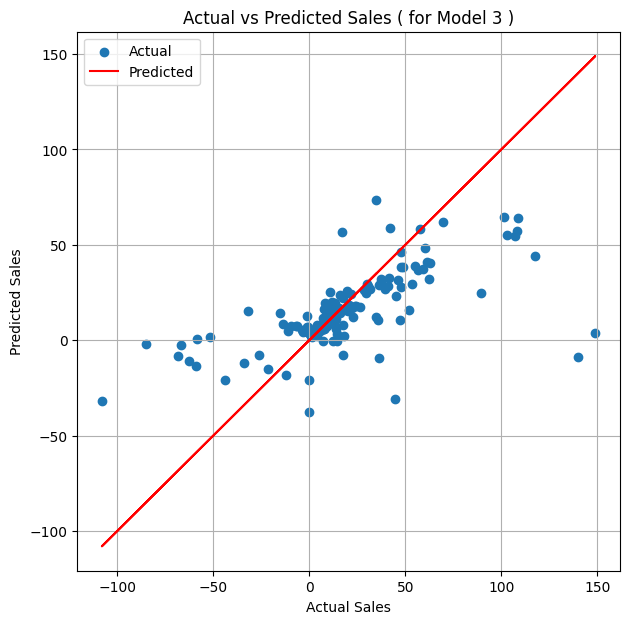

test set for model4
Performance of Model 4:

Mean Squared Error: 633.9254167321694 

Root Mean Squared Error: 25.177875540485328 

Mean Absolute Error: 13.578771717346555 

Explained Variance Score: 0.3402650764234799 

R2 Score: 0.3345373067619227 





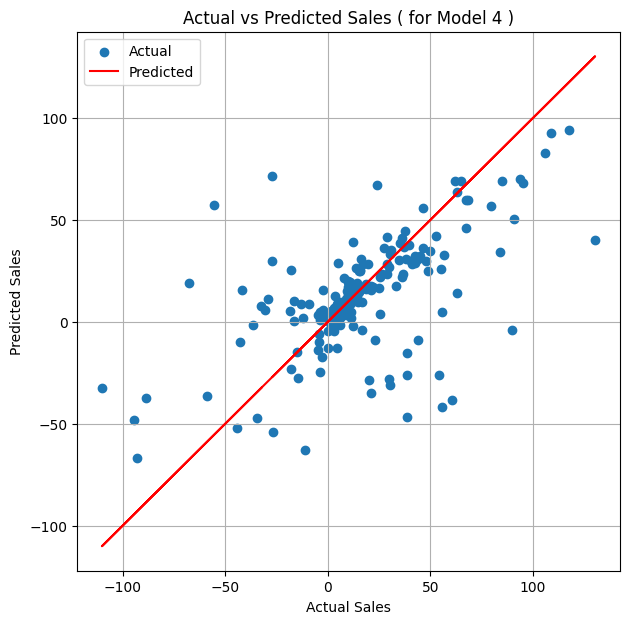



validation set for model4
Performance of Model 4:

Mean Squared Error: 578.1439123781373 

Root Mean Squared Error: 24.044623356961473 

Mean Absolute Error: 12.645919261154106 

Explained Variance Score: 0.48000378287747547 

R2 Score: 0.47848417973316903 





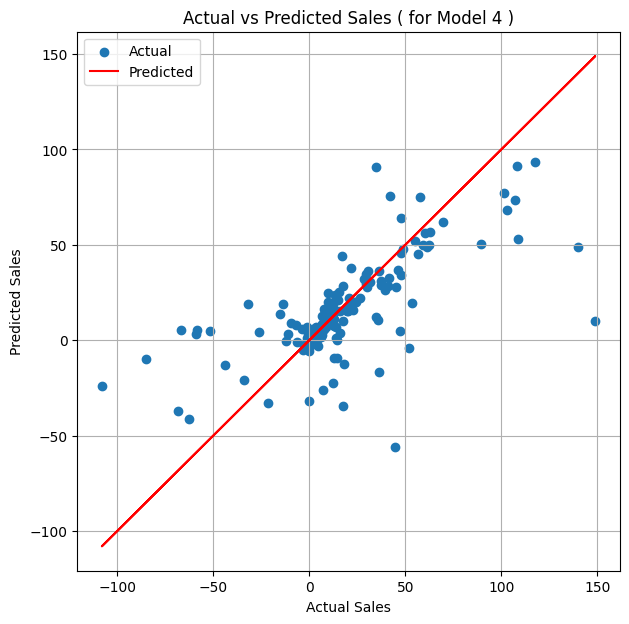

test set for model5
Performance of Model 5:

Mean Squared Error: 838.4829531349393 

Root Mean Squared Error: 28.95657012035333 

Mean Absolute Error: 20.729899116714677 

Explained Variance Score: 0.1293960568043181 

R2 Score: 0.11980319845238685 





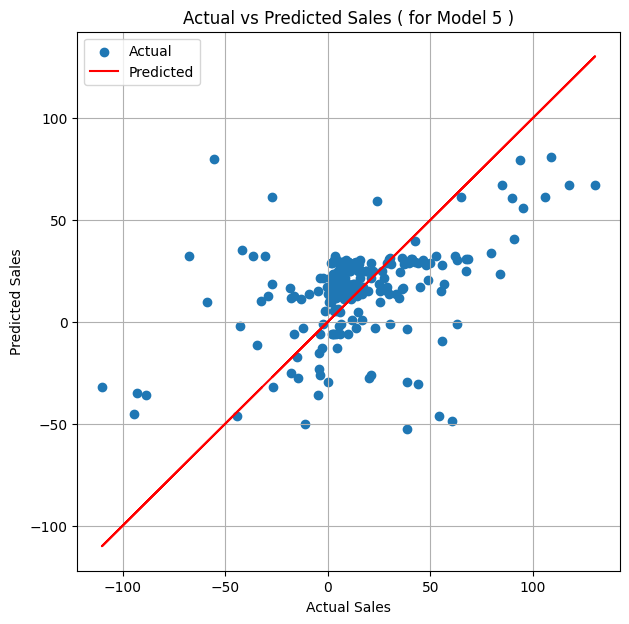



validation set for model5
Performance of Model 5:

Mean Squared Error: 670.2849522228025 

Root Mean Squared Error: 25.889861958357418 

Mean Absolute Error: 19.479200398202945 

Explained Variance Score: 0.4066866181846348 

R2 Score: 0.39536817877560804 





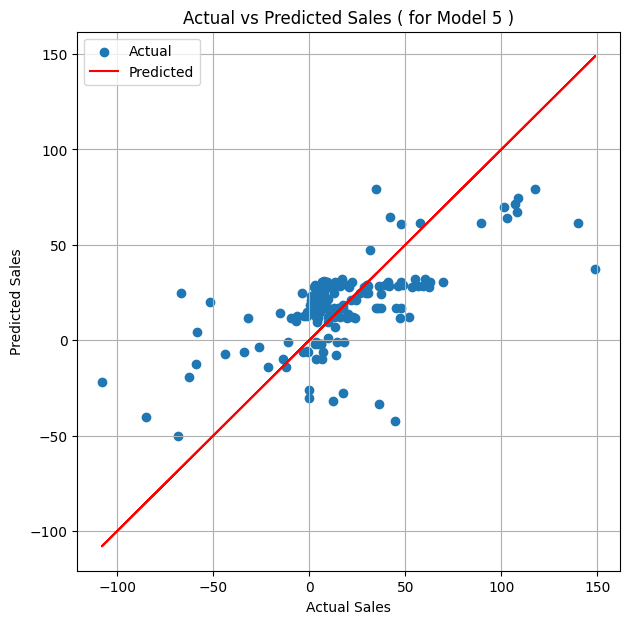

test set for model6
Performance of Model 6:

Mean Squared Error: 915.2464316924807 

Root Mean Squared Error: 30.253040040506352 

Mean Absolute Error: 15.133827131782946 

Explained Variance Score: 0.03930562706414997 

R2 Score: 0.03922079895410757 





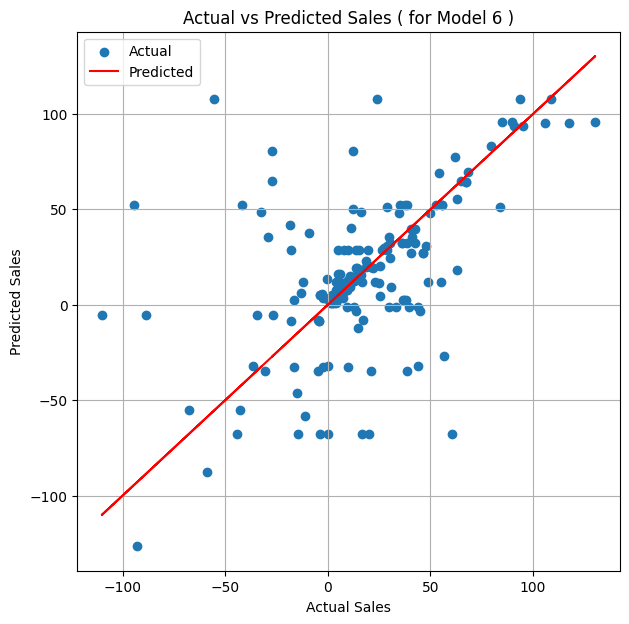



validation set for model6
Performance of Model 6:

Mean Squared Error: 994.5081994790723 

Root Mean Squared Error: 31.535824065324064 

Mean Absolute Error: 15.577839175257735 

Explained Variance Score: 0.10957585684595872 

R2 Score: 0.10290197940510126 





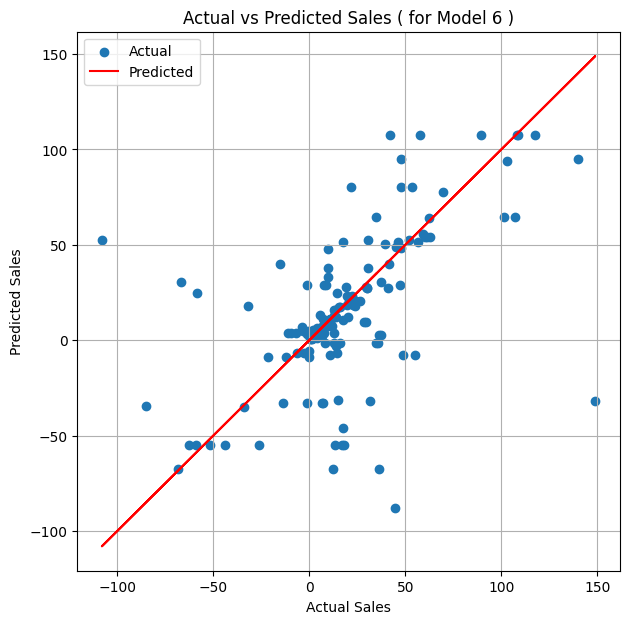

test set for model7
Performance of Model 7:

Mean Squared Error: 1067.7349414702214 

Root Mean Squared Error: 32.67621369544246 

Mean Absolute Error: 21.34593976744186 

Explained Variance Score: -0.1208387672726774 

R2 Score: -0.12085389079039466 





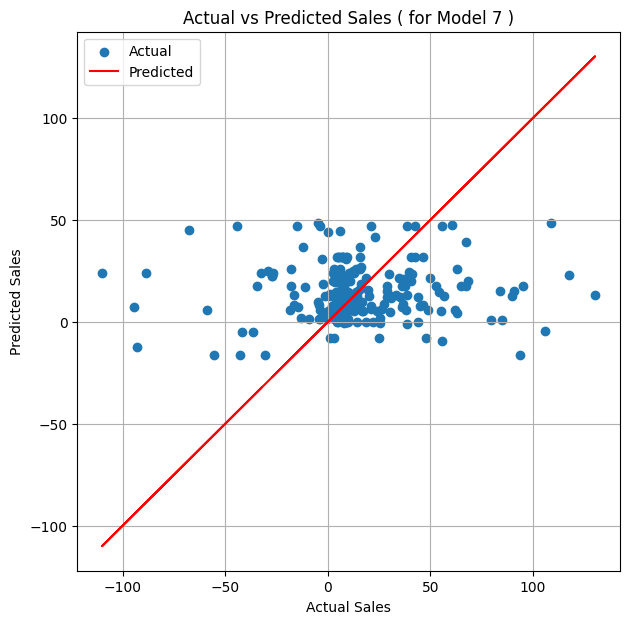



validation set for model7
Performance of Model 7:

Mean Squared Error: 1172.7325168546618 

Root Mean Squared Error: 34.24518238898227 

Mean Absolute Error: 21.008848762886597 

Explained Variance Score: -0.05690623016809204 

R2 Score: -0.057865606446143136 





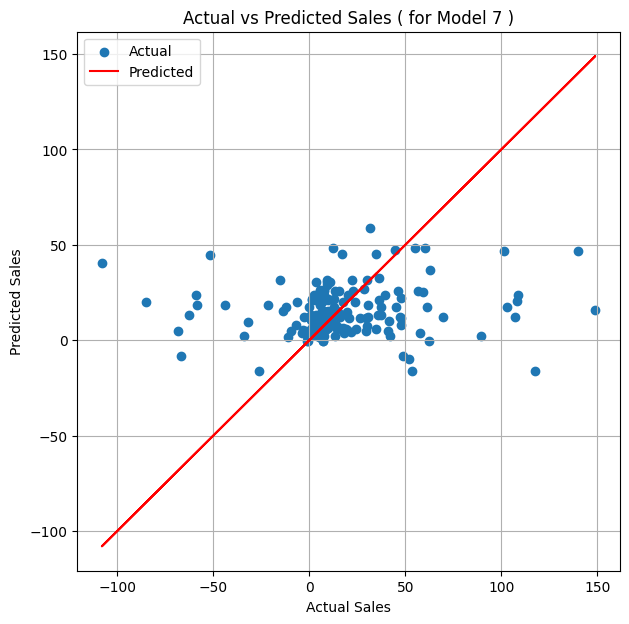

test set for model8
Performance of Model 8:

Mean Squared Error: 974.2464314816909 

Root Mean Squared Error: 31.212920905959617 

Mean Absolute Error: 19.152706206488027 

Explained Variance Score: 0.004719184487624317 

R2 Score: -0.02271440308143724 





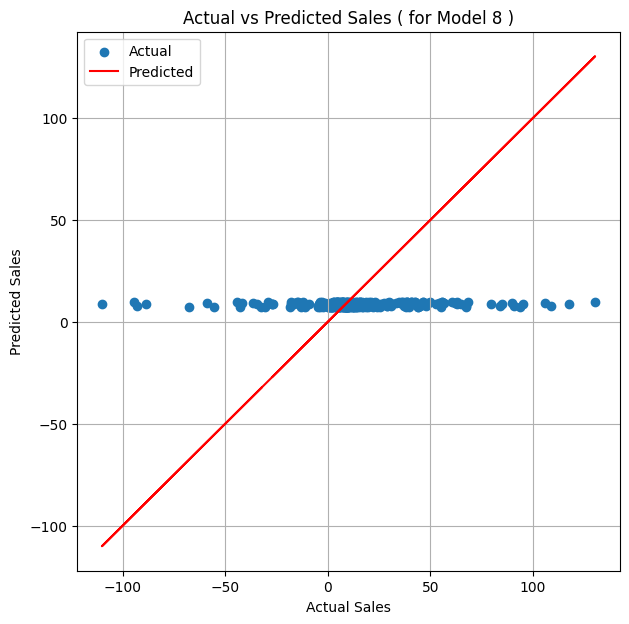



validation set for model8
Performance of Model 8:

Mean Squared Error: 1153.071541046737 

Root Mean Squared Error: 33.95690711838663 

Mean Absolute Error: 20.06315456998108 

Explained Variance Score: 0.004186329916539444 

R2 Score: -0.040130385671198976 





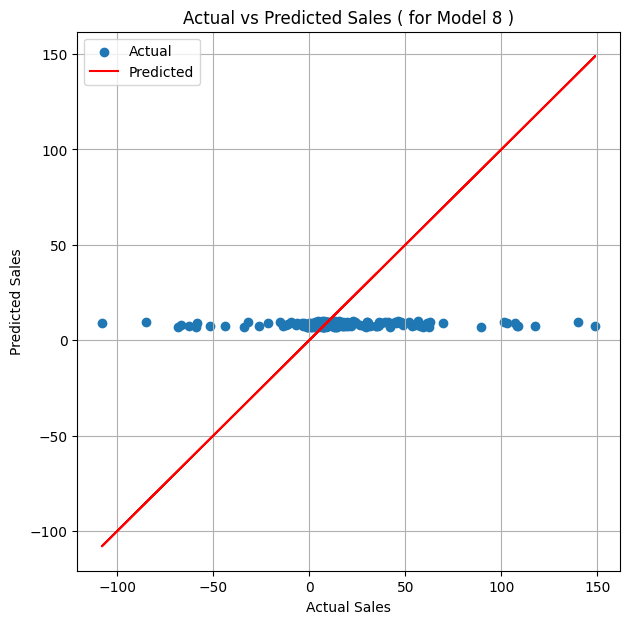

test set for model9
Performance of Model 9:

Mean Squared Error: 842.6159973388185 

Root Mean Squared Error: 29.027848651576274 

Mean Absolute Error: 18.536106165425505 

Explained Variance Score: 0.11682099105335064 

R2 Score: 0.11546453864385064 





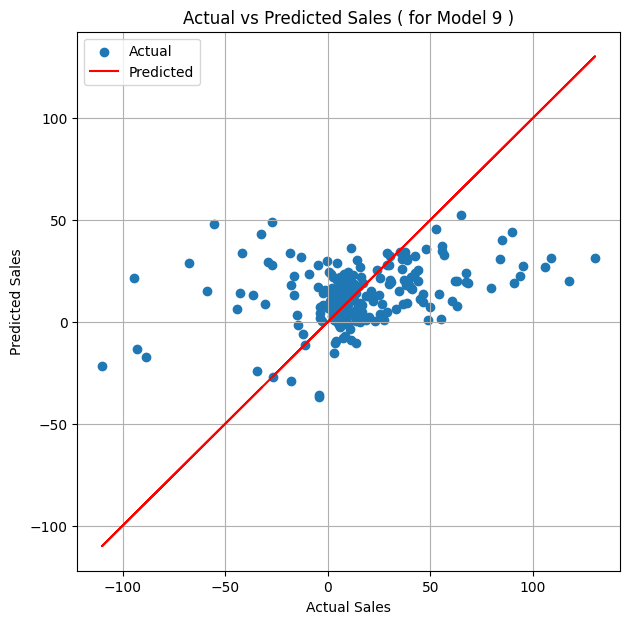



validation set for model9
Performance of Model 9:

Mean Squared Error: 993.0386782930062 

Root Mean Squared Error: 31.51251621646558 

Mean Absolute Error: 19.885059030841802 

Explained Variance Score: 0.10452048093118227 

R2 Score: 0.10422756379739961 





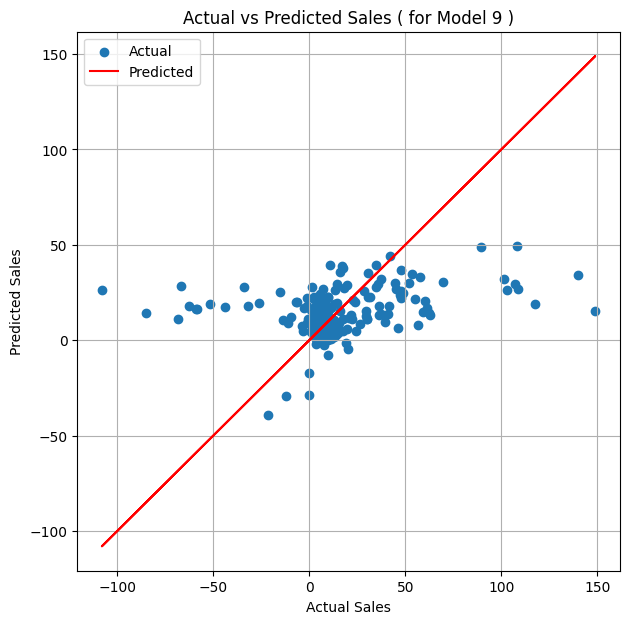

test set for model10
Performance of Model 10:

Mean Squared Error: 921.8217081732197 

Root Mean Squared Error: 30.361516895129263 

Mean Absolute Error: 19.322317872240756 

Explained Variance Score: 0.03552431953986257 

R2 Score: 0.03231840778920769 





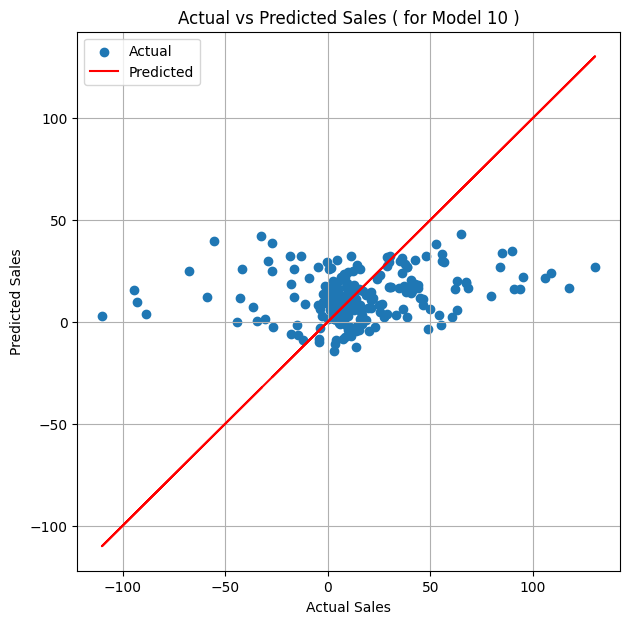



validation set for model10
Performance of Model 10:

Mean Squared Error: 1018.484717742655 

Root Mean Squared Error: 31.91370736443284 

Mean Absolute Error: 20.225930295985318 

Explained Variance Score: 0.08276779372256304 

R2 Score: 0.08127391531645523 





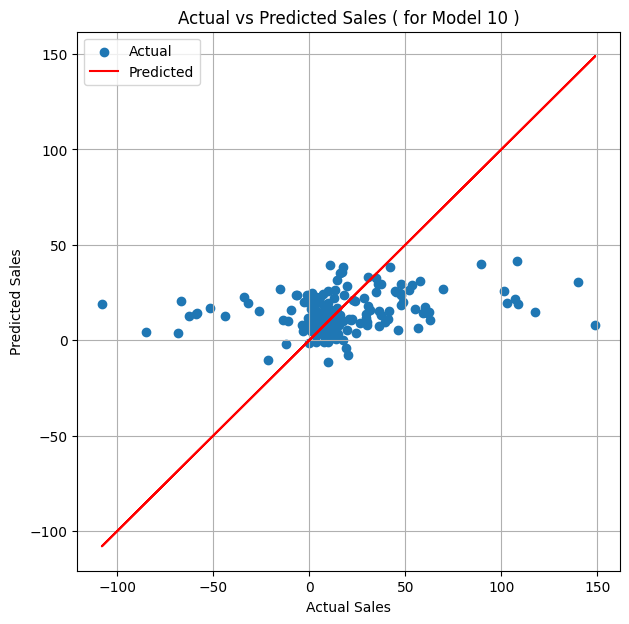

In [33]:

j=1
for i,k in zip([pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10],
               [pred1,pred2,pred3,pred4,pred5,pred6,pred7,pred8,pred9,pred10]):
  print(f'test set for model{j}')
  print(f"Performance of Model {j}:\n")
  print("Mean Squared Error:", mean_squared_error(y_test, i),"\n")
  print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_test, i)),"\n")
  print("Mean Absolute Error:", mean_absolute_error(y_test, i),"\n")
  print("Explained Variance Score:", explained_variance_score(y_test, i),"\n")
  print("R2 Score:", r2_score(y_test, i),"\n")
  print("\n")
  plt.figure(figsize=(7,7))
  plt.scatter(y_test,i)
  plt.plot(y_test,y_test,'r')
  plt.xlabel("Actual Sales")
  plt.ylabel(f"Predicted Sales")
  plt.legend(['Actual','Predicted'])
  plt.title(f"Actual vs Predicted Sales ( for Model {j} )")
  plt.grid(True)
  plt.show()
  print("\n")
  print(f'validation set for model{j}')
  print(f"Performance of Model {j}:\n")
  print("Mean Squared Error:", mean_squared_error(y_val, k),"\n")
  print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_val, k)),"\n")
  print("Mean Absolute Error:", mean_absolute_error(y_val, k),"\n")
  print("Explained Variance Score:", explained_variance_score(y_val, k),"\n")
  print("R2 Score:", r2_score(y_val, k),"\n")
  print("\n")
  plt.figure(figsize=(7,7))
  plt.scatter(y_val,k)
  plt.plot(y_val,y_val,'r')
  plt.xlabel("Actual Sales")
  plt.ylabel(f"Predicted Sales")
  plt.legend(['Actual','Predicted'])
  plt.title(f"Actual vs Predicted Sales ( for Model {j} )")
  plt.grid(True)
  plt.show()
  j+=1


Mean Squared Error: 624.5829567094073
Root Mean Squared Error: 24.991657742322882
Mean Absolute Error: 15.152865836331527
Explained Variance Score: 0.34658629250522743
R2 Score: 0.3443445466108386


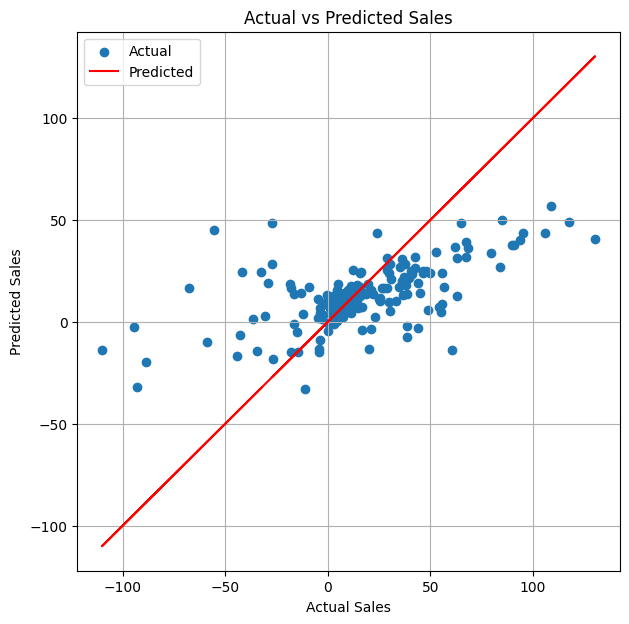

In [35]:
pred_final = np.mean([pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10], axis=0)
print("Mean Squared Error:", mean_squared_error(y_test, pred_final))
print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_test, pred_final)))
print("Mean Absolute Error:", mean_absolute_error(y_test, pred_final))
print("Explained Variance Score:", explained_variance_score(y_test, pred_final))
print("R2 Score:", r2_score(y_test, pred_final))
plt.figure(figsize=(7,7))
plt.scatter(y_test,pred_final)
plt.plot(y_test,y_test,'r')
plt.legend(['Actual','Predicted'])
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.legend(['Actual','Predicted'])
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()



Mean Squared Error: 692.2229161361201
Root Mean Squared Error: 26.310129534765125
Mean Absolute Error: 15.165789552694456
Explained Variance Score: 0.3777044539815656
R2 Score: 0.3755789965317329




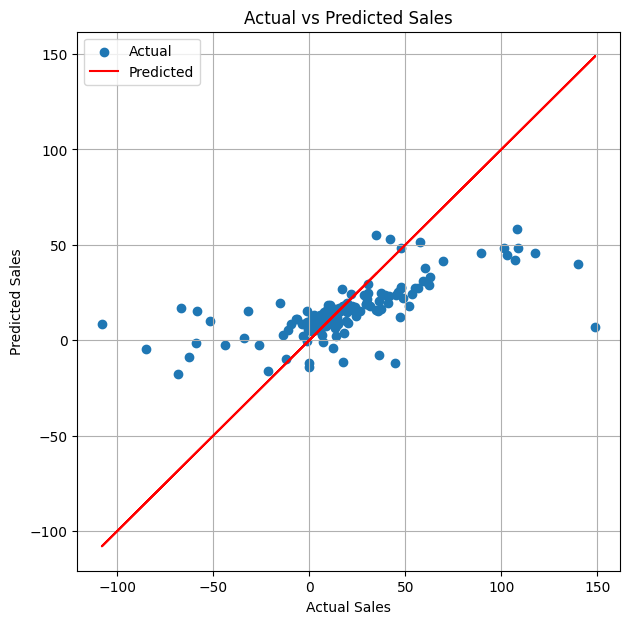

In [36]:
pred_final1 = np.mean([pred1,pred2,pred3,pred4,pred5,pred6,pred7,pred8,pred9,pred10], axis=0)
print("Mean Squared Error:", mean_squared_error(y_val, pred_final1))
print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_val, pred_final1)))
print("Mean Absolute Error:", mean_absolute_error(y_val, pred_final1))
print("Explained Variance Score:", explained_variance_score(y_val, pred_final1))
print("R2 Score:", r2_score(y_val, pred_final1))
print('\n')
plt.figure(figsize=(7,7))
plt.scatter(y_val,pred_final1)
plt.plot(y_val,y_val,'r')
plt.legend(['Actual','Predicted'])
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.legend(['Actual','Predicted'])
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()
